In [1]:
import allel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
from utility_eval.summary_statistics import *




Import data and transform to Genotype array

In [2]:
#get real data file
r_file = 'datasets/chr13/small_CHB.chr13.hap'
r_data = pd.read_csv(r_file, sep = '\t', header=None)
r_data = r_data.to_numpy()
pos = r_data[:,0]
r_data = np.transpose(r_data[:,1:])
r_gen_dat = get_gen_arr(r_data)
r_g_arr = allel.GenotypeArray(np.transpose(r_gen_dat, axes = (1,0,2)))

#get synthetic data
gan_models = ['gan', 'rbm', 'wgan']#, 'wgangp']
s_lst = []
s_data_lst = []

for item in gan_models:
    s_file = f'syn_data/{item}_out_hap_CHB.csv'
    s_data = pd.read_csv(s_file, sep='\t', header=None)
    s_data = s_data.to_numpy()
    pos = s_data[:, 0]
    s_data = np.transpose(s_data[:, 1:])
    s_data_lst.append(s_data)
    s_gen_dat = get_gen_arr(s_data)
    s_g_arr = allel.GenotypeArray(np.transpose(s_gen_dat, axes=(1, 0, 2)))
    s_lst.append(s_g_arr)

data_lst = [r_g_arr] + s_lst
data_labels = ['Real'] + [s.upper() for s in gan_models]

Major Allele Frequency by model for 1000 positions in chromosome 13. We can observe that the GAN has a tendancy to use the reference allele, in contrast with the wgan which seems to choose the allele at random. The RBM synthetic data MAF representation seems closest to the real data. 

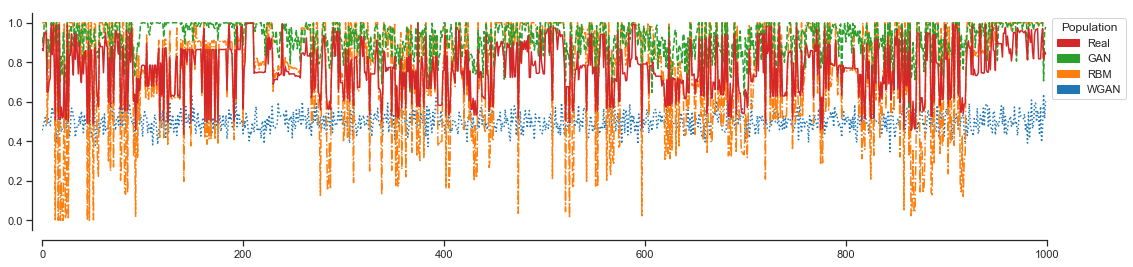

In [3]:
plot_maf([r_data]+s_data_lst, data_labels)

Percentage of heterozygous cells in each sample. 

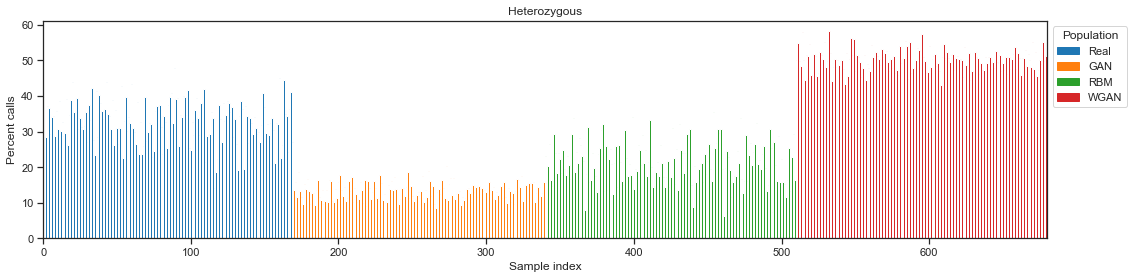

In [4]:
plot_heterozygosity(data_lst, data_labels)

How does the percentage of heterozygossamples for each position align with the expected percentage based on the Hardy-Weinberg equilibrium?

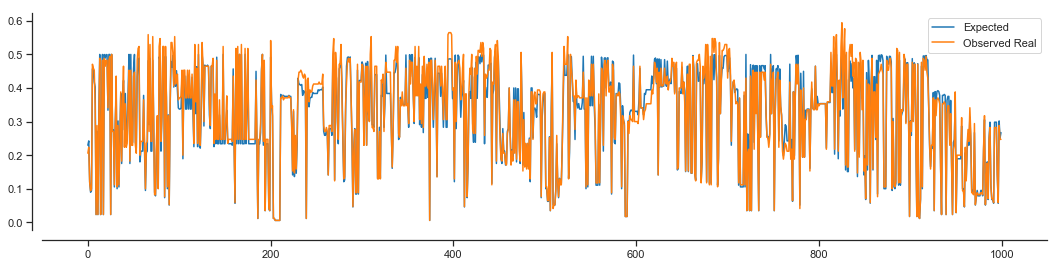

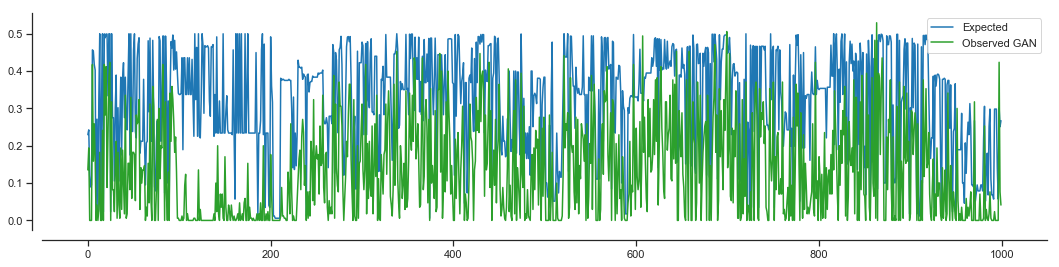

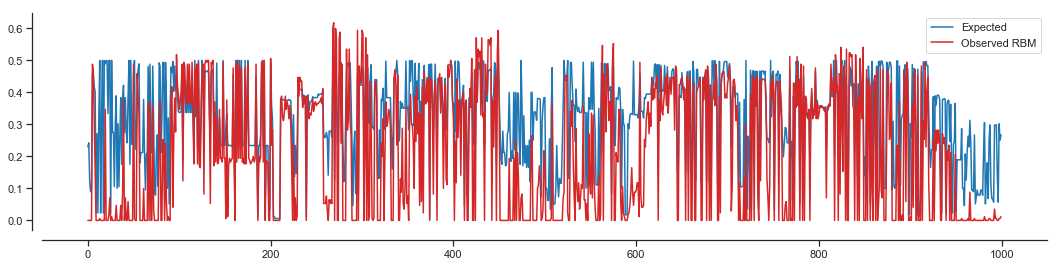

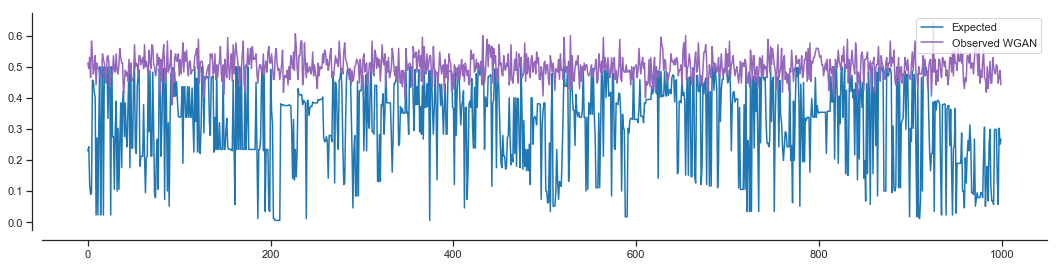

In [5]:
plot_hw_heterozygosity(r_g_arr, data_lst, data_labels)

Alternate and reference allele correlation. This shows the population genetic difference. In the first two graphs, I plotted the real data only, to showcast that if the population has no difference, then only the SNPs on the diagonal should appear. When looking at the real data vs the synthetic datsets, we can observe that not many SNPs are correlated on the diagonal, moslty outside the diagonal, suggesting differences between the synthethetic and real samples.

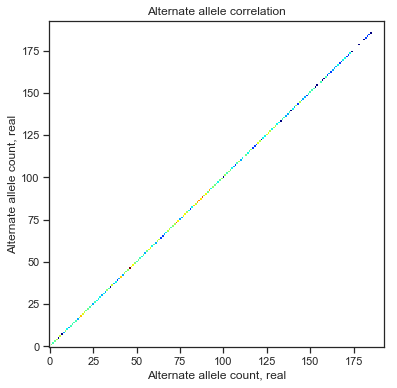

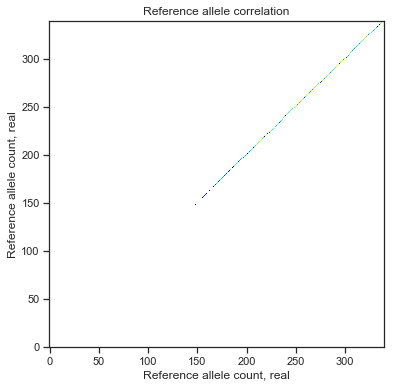

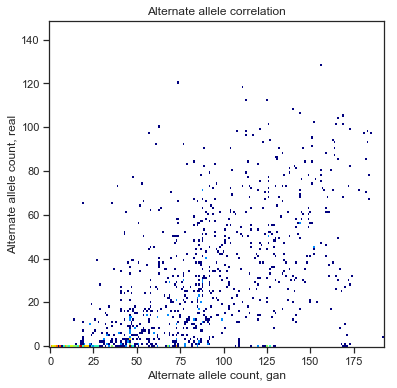

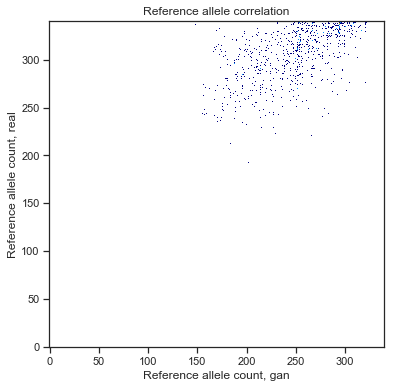

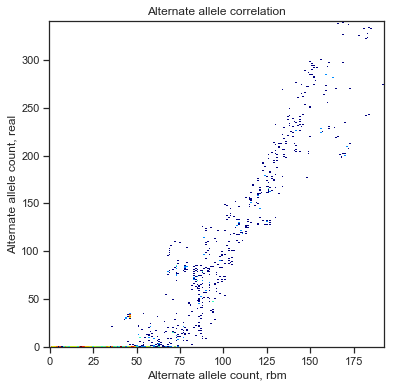

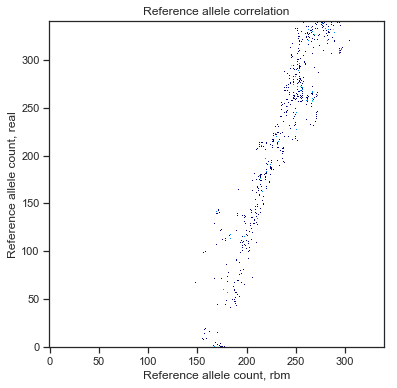

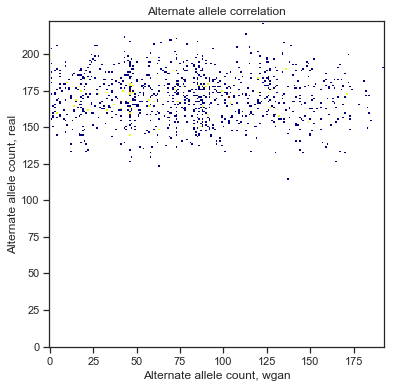

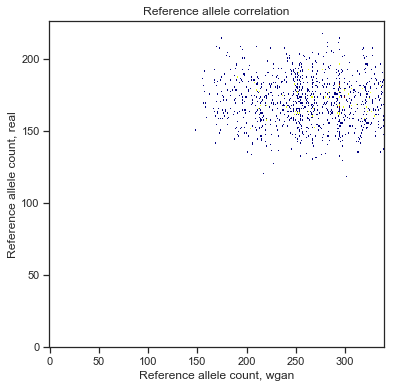

In [6]:
plot_alternate_ac(r_g_arr, r_g_arr,'real')
plot_reference_ac(r_g_arr, r_g_arr,'real')

for i in range(len(s_lst)):
    plot_alternate_ac(r_g_arr, s_lst[i], gan_models[i])
    plot_reference_ac(r_g_arr, s_lst[i], gan_models[i])

The fixation index is a method to assess how “different” a group of populations are from each other.This value, ranges from 0 (not different) to 1 (completely different, no alleles held in common) is a pairwise comparison of differences in allele frequency. 

/Users/bristena/.virtualenvs/private_vae-8wk_03-Y/lib/python3.6/site-packages/allel/stats/misc.py:73: UserWarning: Warning: converting a masked element to nan.
  vj = np.array(vj)


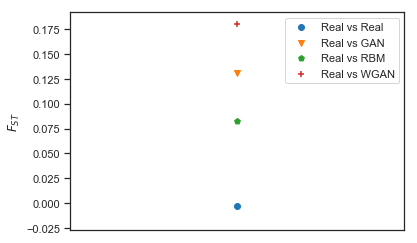

In [7]:
plot_average_hudson_fst(r_g_arr, data_lst, data_labels, np.arange(r_g_arr.shape[0]))

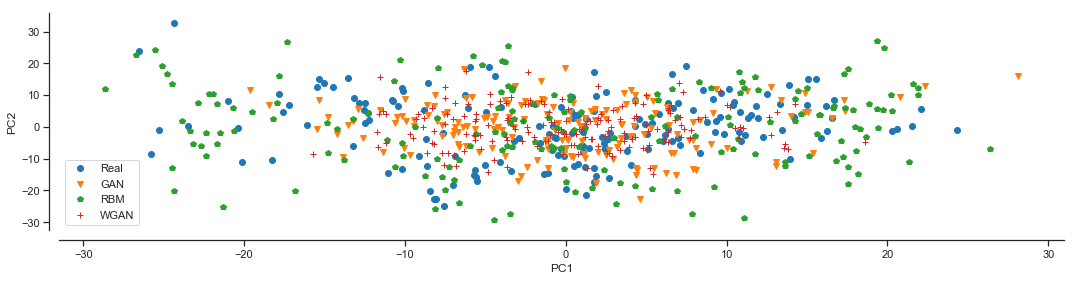

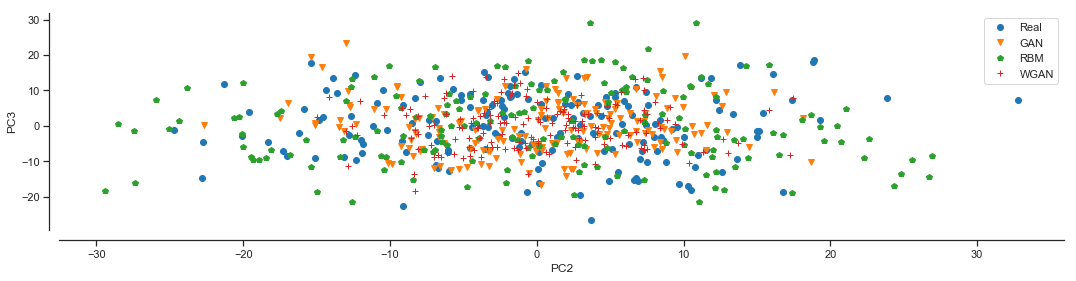

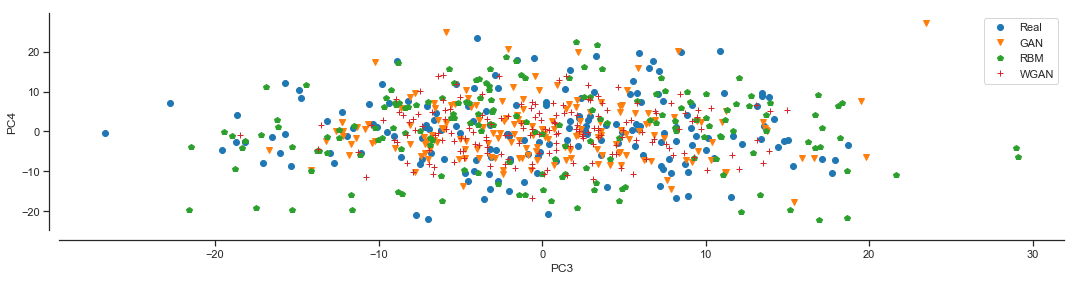

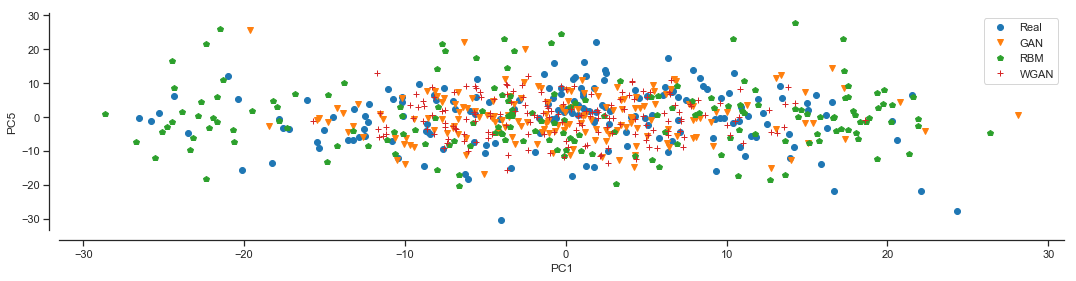

In [9]:
plot_pca_coordinates(data_lst, data_labels, 0, 1)
plot_pca_coordinates(data_lst, data_labels, 1, 2)
plot_pca_coordinates(data_lst, data_labels, 2, 3)
plot_pca_coordinates(data_lst, data_labels, 0, 4)